In [1]:
import torch
from torch import nn
print(torch.__version__)

1.12.1+cu113


In [2]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)


# MNIST is too easy.
Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. 
# MNIST is overused. 
In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
# MNIST can not represent modern CV tasks.

# Fashion MNIST dataset
Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:

60,000 training examples

10,000 testing examples

10 classes

28×28 grayscale/single channel images

![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg)

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#STEP 1: Fashion MNIST 데이터 읽어들이기

In [5]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat", 
             "sandal", "shirt", "sneaker", "bag", "ankle boot"]

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
training_data[0][1]

9

In [10]:
# flatten 28*28 images to a 784 vector for each image
width = height = 28
num_pixels = width * height

num_classes = 10

# 훈련셋과 검증셋 분리
train_data, val_data = torch.utils.data.random_split(training_data, [50000, 10000])

print ('train shape: \t', len(train_data))
print ('valid shape: \t', len(val_data))
print ('test shape: \t', len(test_data))


train shape: 	 50000
valid shape: 	 10000
test shape: 	 10000


In [11]:
batch_size = 100

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for testX, testY in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {testX.shape}")
    print(f"Shape of y: {testY.shape} {testY.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


In [12]:
test_dataloader.dataset.data.shape

torch.Size([10000, 28, 28])

In [13]:
testX.shape

torch.Size([100, 1, 28, 28])

#STEP 2: 데이터 살펴보기

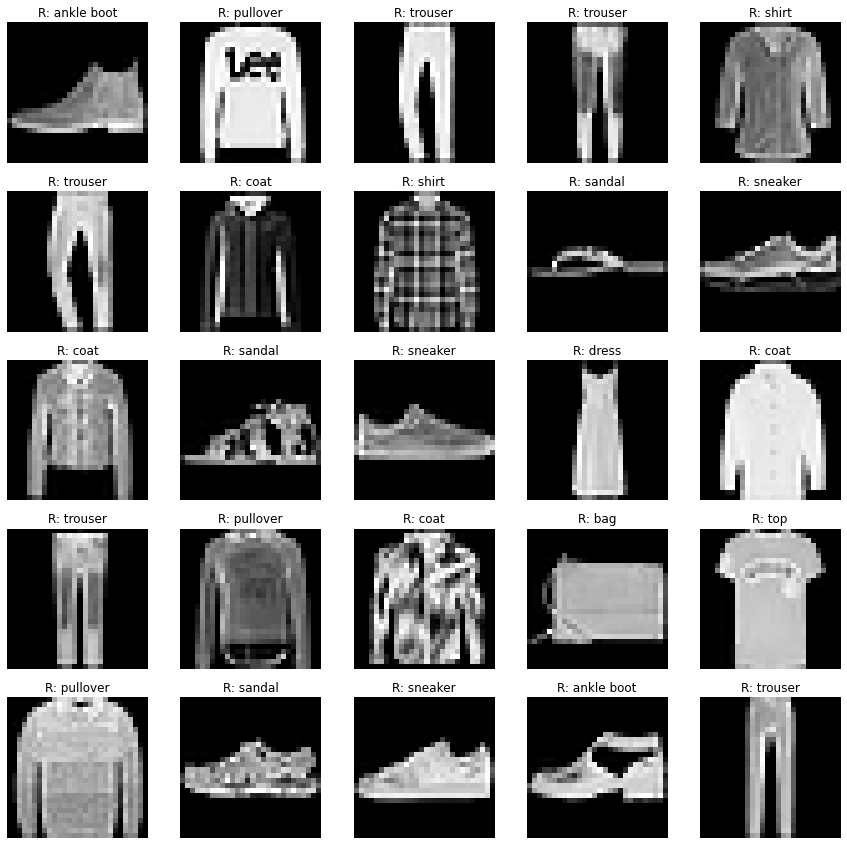

In [14]:
plt_row = 5
plt_col = 5

width = height = 28

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + labelNames[testY[i]]
    sub_plt.set_title(sub_plt_title)

plt.show()

#STEP 3: 딥러닝을 위한 데이터 전처리

In [15]:
testX[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

#STEP 4: 첫번째 인공지능 모델 (퍼셉트론)

![대체 텍스트](https://www.simplilearn.com/ice9/free_resources_article_thumb/diagram-of-a-biological-neuron.jpg)

![대체 텍스트](http://bit.ly/2ldH0Bg)

In [16]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.flatten = nn.Flatten()
    self.log_reg = nn.Sequential(
        nn.Linear(num_pixels, num_classes),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.log_reg(x)
    return logits

In [46]:
model = LogisticRegression().to(device)

In [47]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


#STEP 5: 첫번째 인공지능 모델 학습!!!

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

In [20]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    correct /= size

    print(f"Train: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")

    return train_loss, 100*correct

In [21]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, 100*correct

In [49]:
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309973  [    0/50000]
loss: 0.646663  [10000/50000]
loss: 0.610393  [20000/50000]
loss: 0.755498  [30000/50000]
loss: 0.553119  [40000/50000]
Train: 
 Accuracy: 78.0%, Avg loss: 0.678032 

Test: 
 Accuracy: 81.9%, Avg loss: 0.534517 

Epoch 2
-------------------------------
loss: 0.534577  [    0/50000]
loss: 0.460759  [10000/50000]
loss: 0.524083  [20000/50000]
loss: 0.686839  [30000/50000]
loss: 0.486284  [40000/50000]
Train: 
 Accuracy: 83.1%, Avg loss: 0.509938 

Test: 
 Accuracy: 83.3%, Avg loss: 0.488917 

Epoch 3
-------------------------------
loss: 0.484022  [    0/50000]
loss: 0.425178  [10000/50000]
loss: 0.499515  [20000/50000]
loss: 0.663066  [30000/50000]
loss: 0.461344  [40000/50000]
Train: 
 Accuracy: 84.0%, Avg loss: 0.477372 

Test: 
 Accuracy: 83.9%, Avg loss: 0.468246 

Epoch 4
-------------------------------
loss: 0.458860  [    0/50000]
loss: 0.408235  [10000/50000]
loss: 0.484617  [20000/50000]
loss: 0.651572  [3000

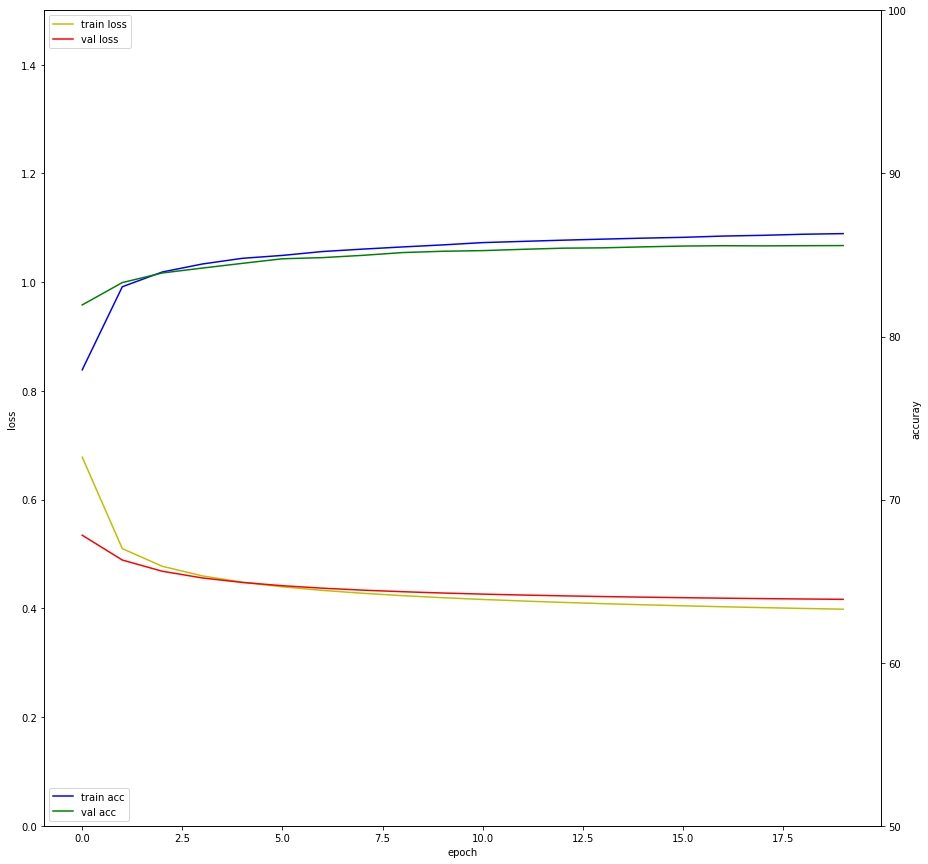

In [50]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


#STEP 6: 결과 확인 (테스트 데이터셋)

In [51]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 84.3%, Avg loss: 0.444806 

Baseline Error: 15.69%


#STEP 7: 학습된 weight 살펴보기

W shape :  (10, 784)


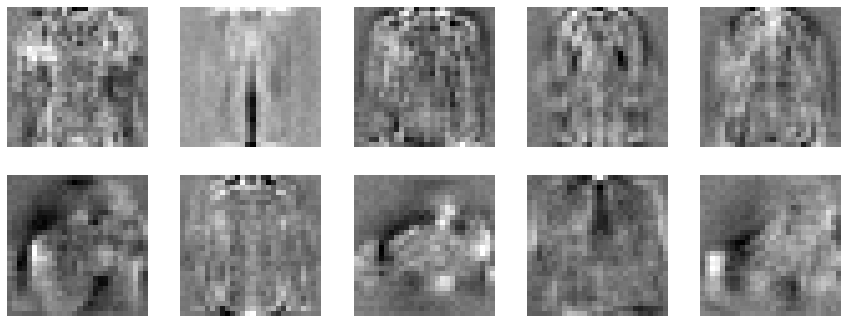

In [52]:
# Visualize weights
W = model.log_reg[0].weight.cpu().detach().numpy()
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W):
    plt.subplot(5, 5, ind + 1)
    im = val.reshape((28,28))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg)

#STEP 8: 두번째 인공지능 모델 (MLP)

![대체 텍스트](https://www.researchgate.net/profile/Hadley_Brooks/publication/270274130/figure/fig3/AS:667886670594050@1536247999230/Architecture-of-a-multilayer-neural-network-with-one-hidden-layer-The-input-layer.png)

In [53]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self):
    super(MultiLayerPerceptron, self).__init__()
    self.flatten = nn.Flatten()
    self.mlp = nn.Sequential(
        nn.Linear(num_pixels, 256),
        nn.Sigmoid(),
        nn.Linear(256, num_classes),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

In [54]:
# build the model
model = MultiLayerPerceptron().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
           Sigmoid-3                  [-1, 256]               0
            Linear-4                   [-1, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.78
Estimated Total Size (MB): 0.79
----------------------------------------------------------------
Epoch 1
-------------------------------
loss: 2.316170  [    0/50000]
loss: 1.485126  [10000/50000]
loss: 1.061400  [20000/50000]
loss: 0.974858  [30000/50000]
loss: 0.807665  [40000/50000]
Train: 
 Accuracy: 64.6%, Avg loss: 1.135686 

Test: 
 Accuracy: 75.4%, Avg loss: 0.705990 

Epoch 2
-------

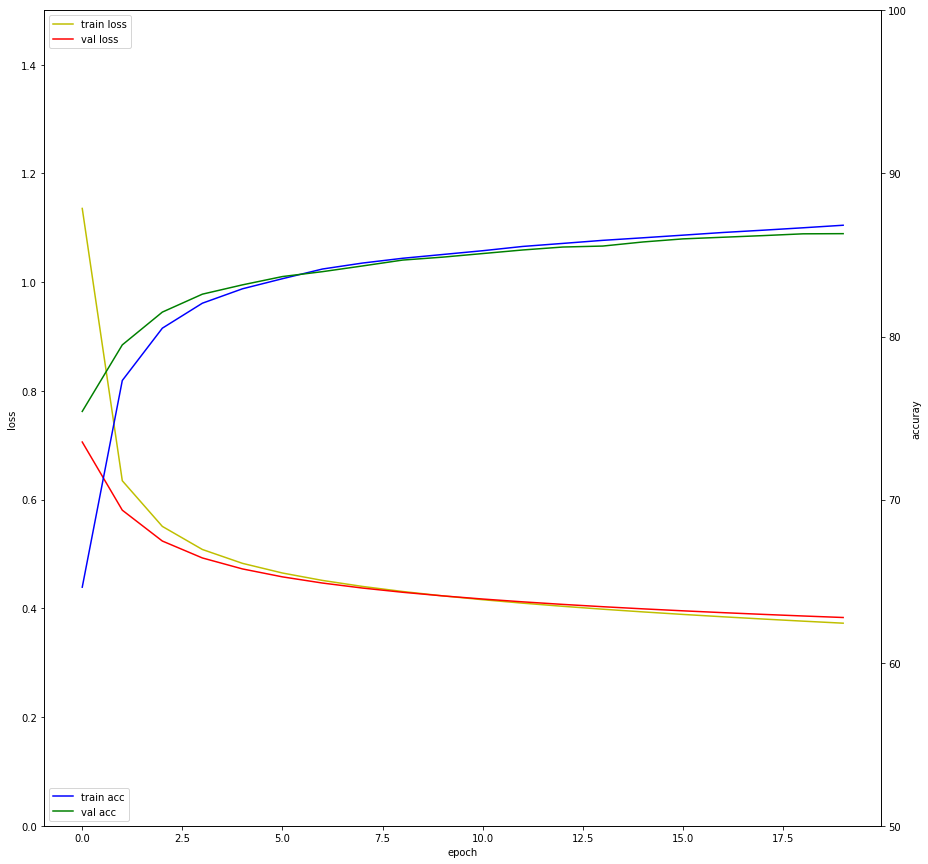

In [55]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [30]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 85.8%, Avg loss: 0.420230 

Baseline Error: 14.23%


#STEP 9: 세번째 인공지능 모델 (DEEP-MLP)

![대체 텍스트](https://i.stack.imgur.com/OH3gI.png)

![대체 텍스트](http://www.saedsayad.com/images/ANN_Sigmoid.png)

In [56]:
class DeepLayerPerceptron(nn.Module):
  def __init__(self):
    super(DeepLayerPerceptron, self).__init__()
    self.flatten = nn.Flatten()
    self.mlp = nn.Sequential(
        nn.Linear(num_pixels, 256),
        nn.Sigmoid(),
        nn.Linear(256, 256),
        nn.Sigmoid(),        
        nn.Linear(256, 256),
        nn.Sigmoid(),        
        nn.Linear(256, 256),
        nn.Sigmoid(),        
        nn.Linear(256, 256),
        nn.Sigmoid(),        
        nn.Linear(256, num_classes),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

In [57]:
# build the model
model = DeepLayerPerceptron().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
           Sigmoid-3                  [-1, 256]               0
            Linear-4                  [-1, 256]          65,792
           Sigmoid-5                  [-1, 256]               0
            Linear-6                  [-1, 256]          65,792
           Sigmoid-7                  [-1, 256]               0
            Linear-8                  [-1, 256]          65,792
           Sigmoid-9                  [-1, 256]               0
           Linear-10                  [-1, 256]          65,792
          Sigmoid-11                  [-1, 256]               0
           Linear-12                   [-1, 10]           2,570
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
-------------------------------

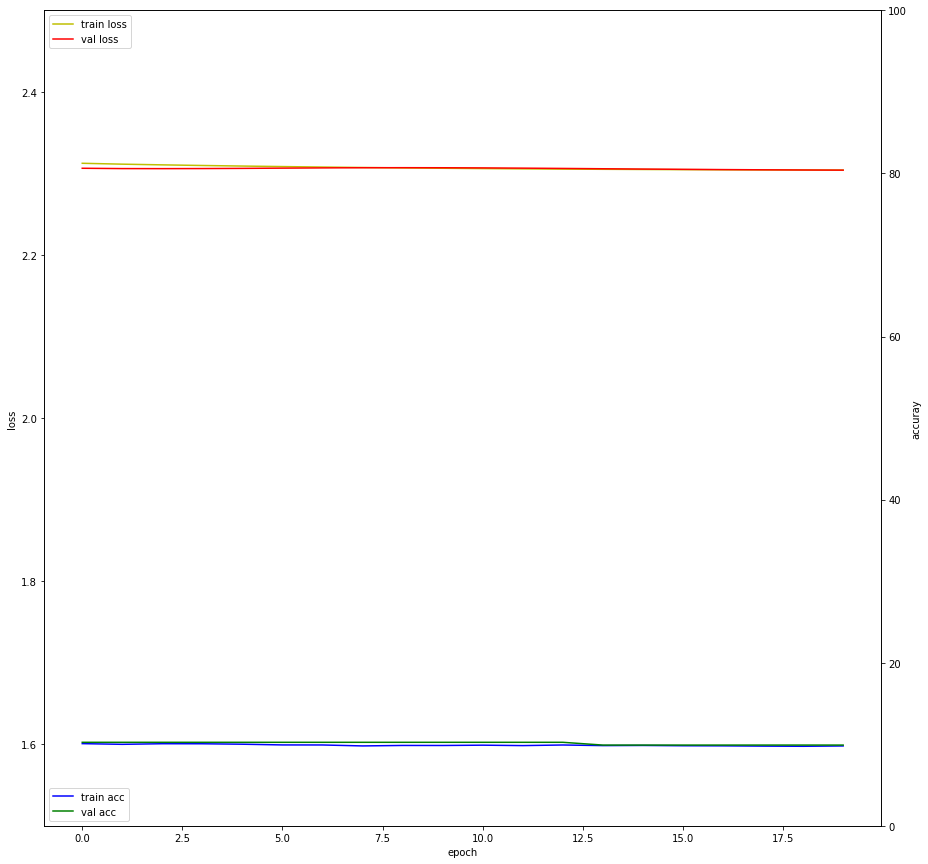

In [58]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([1.5, 2.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([0, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [59]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 10.0%, Avg loss: 2.303933 

Baseline Error: 90.00%


#STEP 10: 세번째 인공지능 모델의 문제점과 개선

![대체 텍스트](https://image.slidesharecdn.com/usuconference-deeplearning-160418191119/95/introduction-to-deep-learning-7-638.jpg?cb=1461006739)

![대체 텍스트](https://smartstuartkim.files.wordpress.com/2019/02/vanishinggradient-1.png?w=1140&h=492)

In [60]:
class DeepLayerPerceptronRelu(nn.Module):
  def __init__(self):
    super(DeepLayerPerceptronRelu, self).__init__()
    self.flatten = nn.Flatten()
    self.mlp = nn.Sequential(
        nn.Linear(num_pixels, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, num_classes),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

In [61]:
# build the model
model = DeepLayerPerceptronRelu().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 256]          65,792
              ReLU-5                  [-1, 256]               0
            Linear-6                  [-1, 256]          65,792
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 256]          65,792
              ReLU-9                  [-1, 256]               0
           Linear-10                  [-1, 256]          65,792
             ReLU-11                  [-1, 256]               0
           Linear-12                   [-1, 10]           2,570
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
-------------------------------

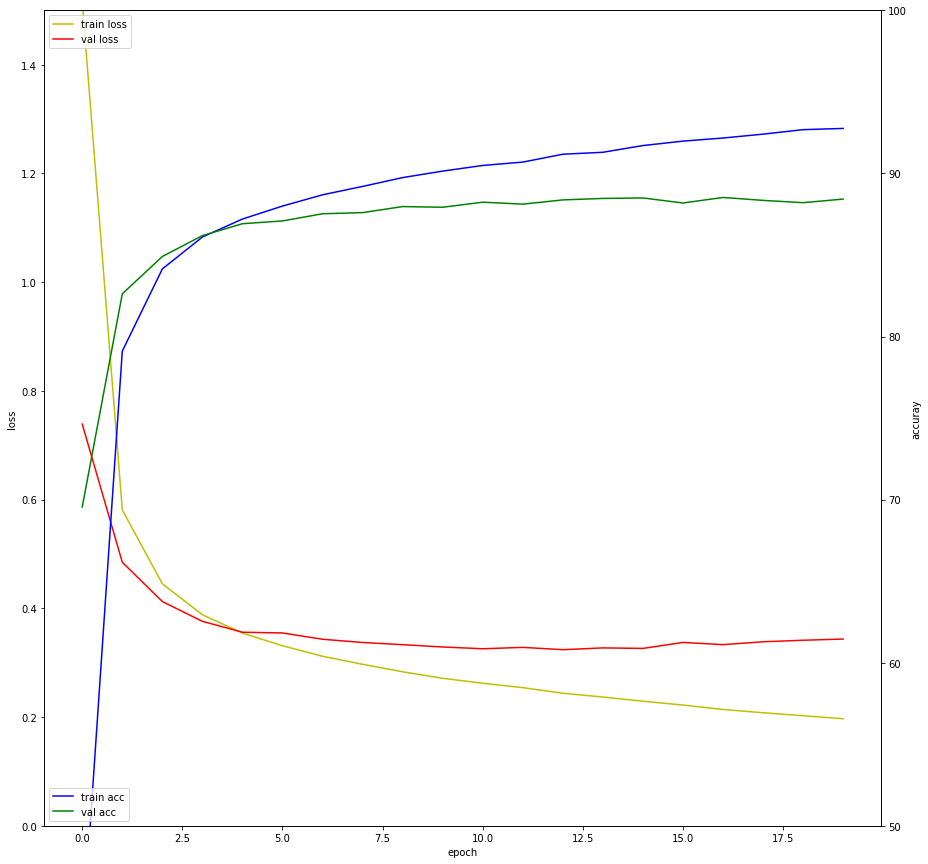

In [62]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [63]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 87.4%, Avg loss: 0.381720 

Baseline Error: 12.63%


![대체 텍스트](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [64]:
class DeepLayerPerceptronReluDropout(nn.Module):
  def __init__(self):
    super(DeepLayerPerceptronReluDropout, self).__init__()
    self.flatten = nn.Flatten()
    self.mlp = nn.Sequential(
        nn.Linear(num_pixels, 256),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(256, num_classes),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

In [65]:
# build the model
model = DeepLayerPerceptronReluDropout().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
           Dropout-4                  [-1, 256]               0
            Linear-5                  [-1, 256]          65,792
              ReLU-6                  [-1, 256]               0
           Dropout-7                  [-1, 256]               0
            Linear-8                  [-1, 256]          65,792
              ReLU-9                  [-1, 256]               0
          Dropout-10                  [-1, 256]               0
           Linear-11                  [-1, 256]          65,792
             ReLU-12                  [-1, 256]               0
          Dropout-13                  [-1, 256]               0
           Linear-14                  [

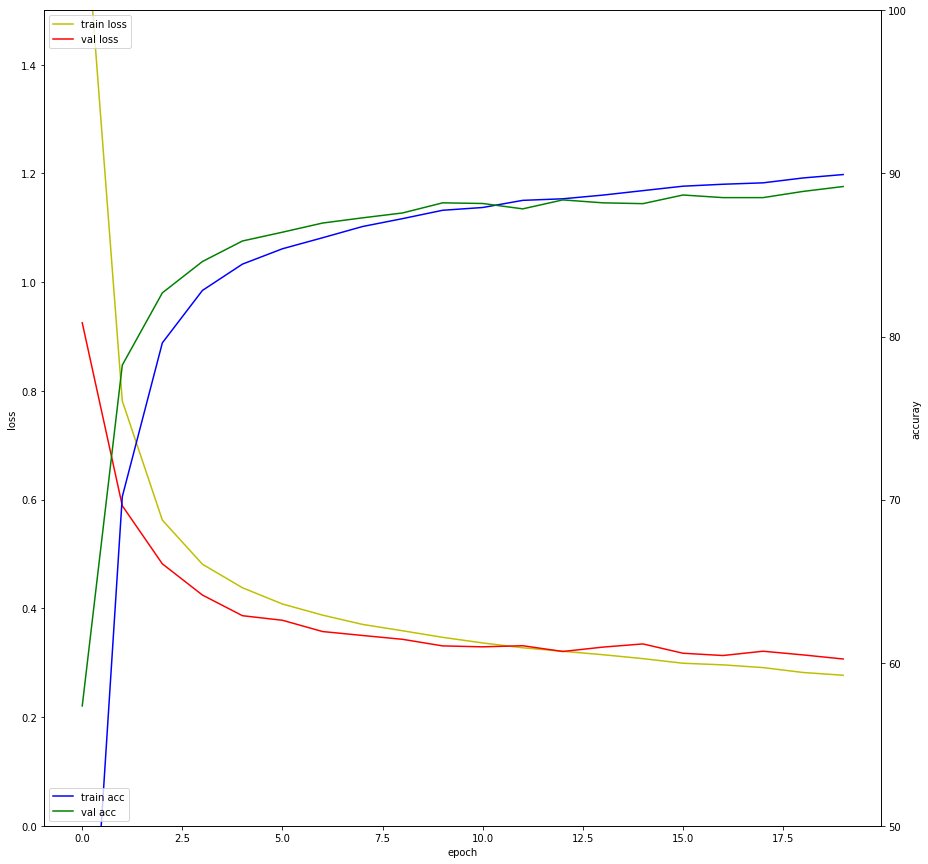

In [66]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [67]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 88.3%, Avg loss: 0.338737 

Baseline Error: 11.72%


#STEP 11: 네번째 인공지능 모델 (CNN)

![대체 텍스트](https://www.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)


# 중요! 입력데이터의 형태가 바뀌어야 한다. 
# 784 (1D) -> 28x28 (2D)

In [72]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 32, 5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*12*12, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [73]:
# build the model
model = SimpleCNN().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
              ReLU-2           [-1, 32, 24, 24]               0
         MaxPool2d-3           [-1, 32, 12, 12]               0
           Flatten-4                 [-1, 4608]               0
            Linear-5                  [-1, 128]         589,952
            Linear-6                   [-1, 10]           1,290
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.35
Params size (MB): 2.26
Estimated Total Size (MB): 2.61
----------------------------------------------------------------
Epoch 1
-------------------------------
loss: 2.301720  [    0/50000]
loss: 0.527479  [10000/50000]
loss: 0.605052  [20000/50000]
loss: 0.716180  [30000/50000]
loss: 0.46

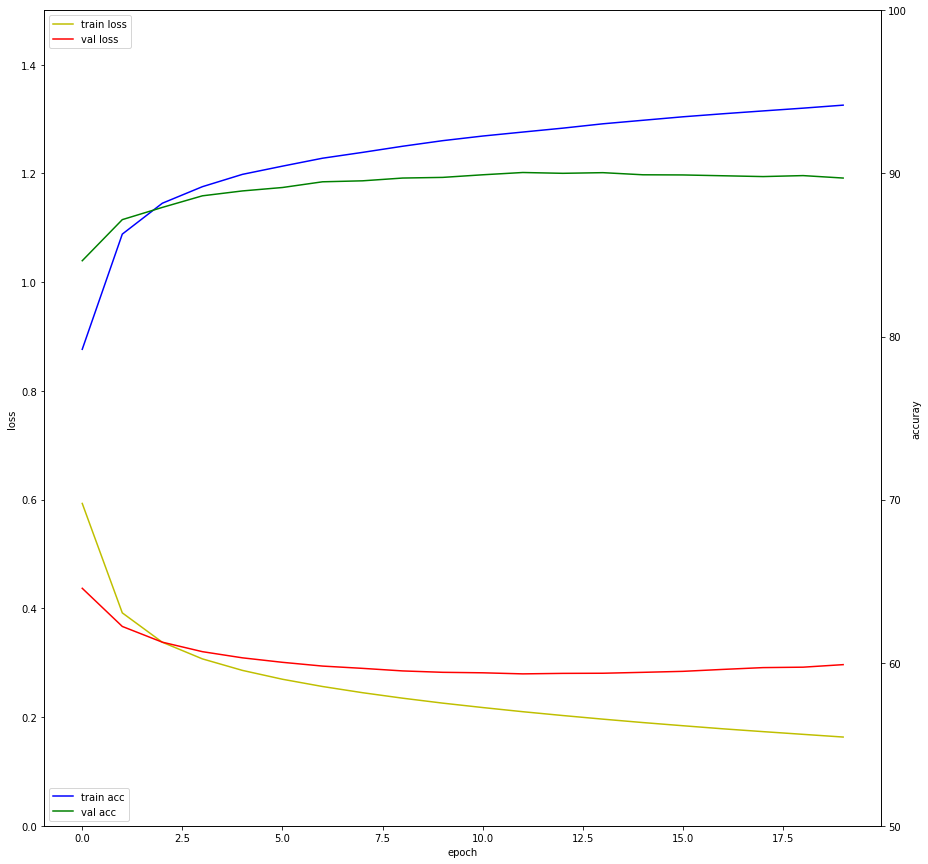

In [74]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [75]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 89.7%, Avg loss: 0.309048 

Baseline Error: 10.32%


#STEP 12: Convolution kernel 살펴보기 (5x5)

(32, 1, 5, 5)


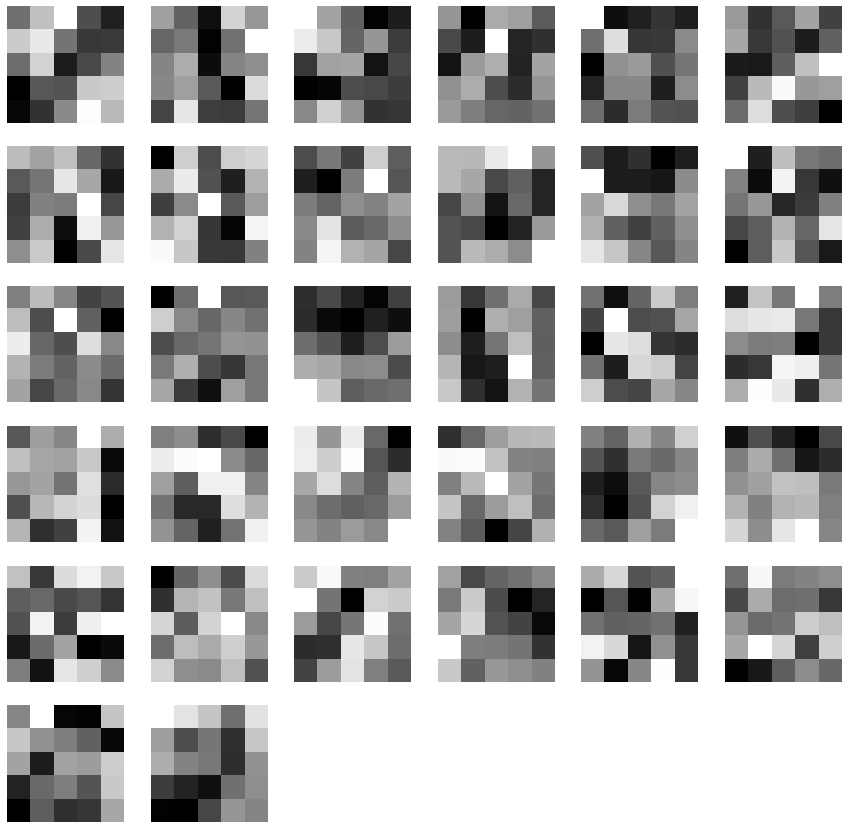

In [82]:
W1 = model.conv.weight.cpu().detach().numpy()

print(W1.shape)

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((5,5))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

In [78]:
model.conv.weight

Parameter containing:
tensor([[[[-0.0578,  0.2653,  0.5182, -0.1872, -0.3687],
          [ 0.3108,  0.4272, -0.0391, -0.2757, -0.2675],
          [-0.0685,  0.3351, -0.3866, -0.2090,  0.0220],
          [-0.5011, -0.1520, -0.1636,  0.3007,  0.3176],
          [-0.4755, -0.2992,  0.0471,  0.5091,  0.2386]]],


        [[[ 0.1846, -0.0679, -0.4194,  0.4051,  0.1470],
          [-0.0573,  0.0236, -0.4767, -0.0076,  0.5851],
          [ 0.0744,  0.2357, -0.4332,  0.0709,  0.1098],
          [ 0.0828,  0.1804, -0.1101, -0.4853,  0.4314],
          [-0.1997,  0.4782, -0.2237, -0.2349,  0.0054]]],


        [[[ 0.3658,  0.1397, -0.0230, -0.2624, -0.1941],
          [ 0.3168,  0.2284, -0.0156,  0.1036, -0.1220],
          [-0.1300,  0.1320,  0.1425, -0.2209, -0.0899],
          [-0.2681, -0.2553, -0.0766, -0.0893, -0.1168],
          [ 0.0689,  0.2483,  0.0964, -0.1428, -0.1338]]],


        [[[ 0.2571, -0.6671,  0.3897,  0.3211, -0.1028],
          [-0.2150, -0.4837,  0.9161, -0.4328, -0.3603

In [96]:
!pip install torch_intermediate_layer_getter
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torch-intermediate-layer-getter: filename=torch_intermediate_layer_getter-0.1.post1-py3-none-any.whl size=3726 sha256=ba6b5c04377c2a535d42833efd6a67b3c68d6437747b257952be765066e66479
  Stored in directory: /root/.cache/pip/wheels/59/53/37/8b81c4711686fbae03a35d8d1dac5edd9e4af9221fa8e17f6f
Successfully built torch-intermediate-layer-getter


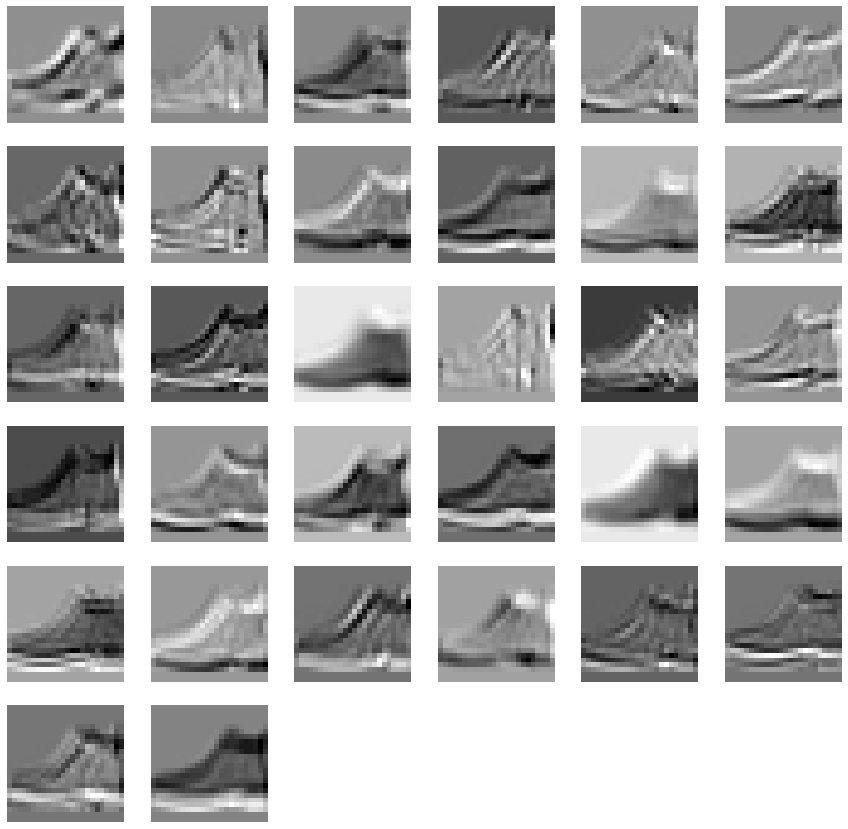

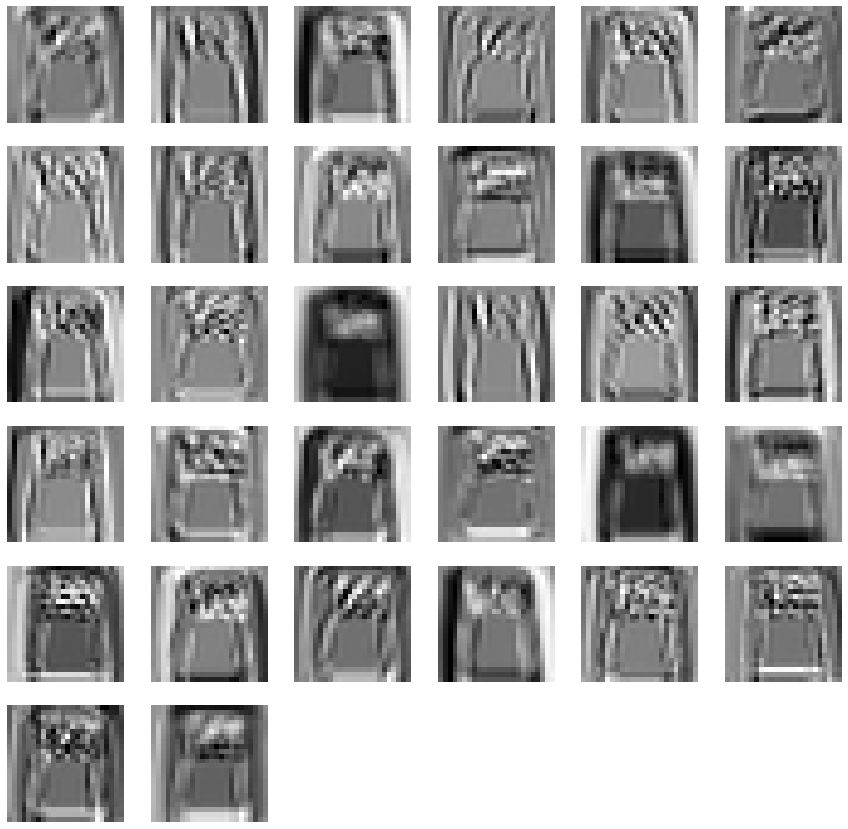

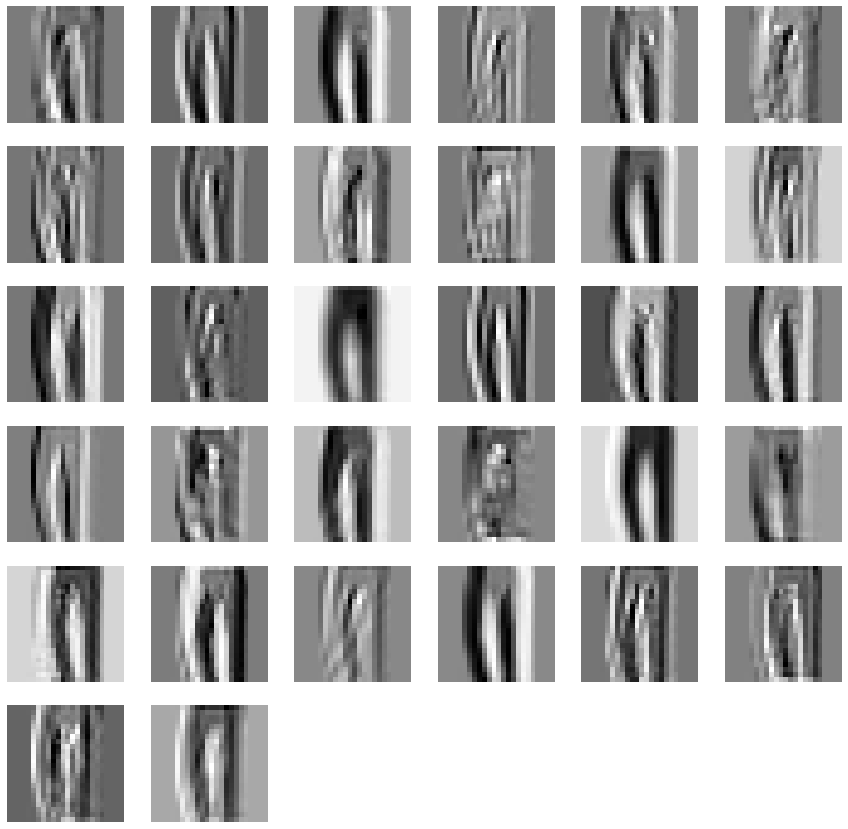

In [107]:
return_layers = {
    'conv':'conv',
}

test_cases = testX[0:3].to(device)

mid_getter = MidGetter(model, return_layers=return_layers, keep_output=True)
mid_outputs, model_output = mid_getter(test_cases)

#print(mid_outputs['conv'].shape)
x_rep = mid_outputs['conv'].cpu().detach().numpy()
x_rep = np.squeeze(x_rep)

#print(x_rep.shape)

for this_x_rep in x_rep:
    plt.figure(figsize=(15, 15), frameon=False)
    
    #print(this_x_rep.shape)

    for i in range (this_x_rep.shape[0]):
        val = this_x_rep[i,:,:]
        plt.subplot(6, 6, i + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

In [98]:
testX[0:3].shape

torch.Size([3, 1, 28, 28])

#STEP 13: 마지막 인공지능 모델 (VGG-like CNN)

![대체 텍스트](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [108]:
class VGGLikeCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(VGGLikeCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2)) 
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*64, 128),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        return out

In [109]:
# build the model
model = VGGLikeCNN().to(device)
summary(model, input_size=(1, 28, 28))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
epochs = 20

loss = []
accuracy = []
val_loss = []
val_accuracy = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tmp_loss, tmp_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    loss.append(tmp_loss)
    accuracy.append(tmp_accuracy)
    tmp_loss, tmp_accuracy = test(val_dataloader, model, loss_fn)
    val_loss.append(tmp_loss)
    val_accuracy.append(tmp_accuracy)
print("Done!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
            Conv2d-4           [-1, 32, 28, 28]           9,248
       BatchNorm2d-5           [-1, 32, 28, 28]              64
              ReLU-6           [-1, 32, 28, 28]               0
         MaxPool2d-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 64, 14, 14]          18,496
       BatchNorm2d-9           [-1, 64, 14, 14]             128
             ReLU-10           [-1, 64, 14, 14]               0
           Conv2d-11           [-1, 64, 14, 14]          36,928
      BatchNorm2d-12           [-1, 64, 14, 14]             128
             ReLU-13           [-1, 64, 14, 14]               0
        MaxPool2d-14             [-1, 6

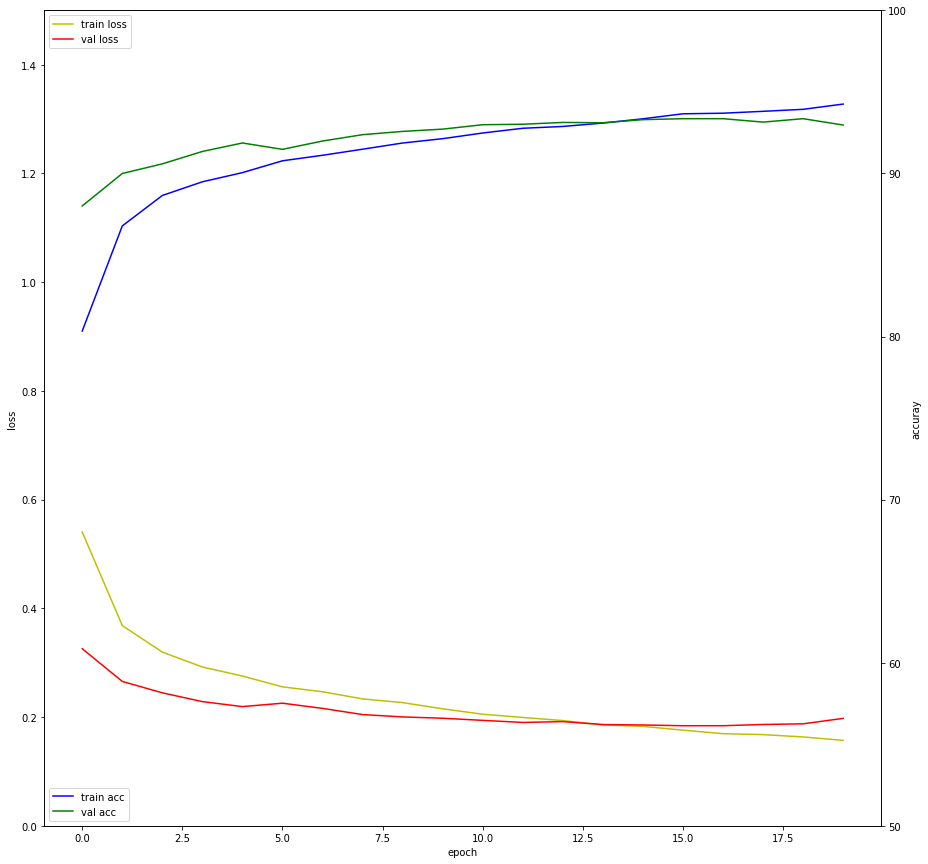

In [110]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(accuracy, 'b', label='train acc')
acc_ax.plot(val_accuracy, 'g', label='val acc')
acc_ax.set_ylim([50, 100])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [111]:
# Final evaluation of the model
test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
print("Baseline Error: %.2f%%" % (100-test_accuracy))

Test: 
 Accuracy: 92.8%, Avg loss: 0.208501 

Baseline Error: 7.17%


#STEP 14: 결과 확인하기 (틀린 것 들만)

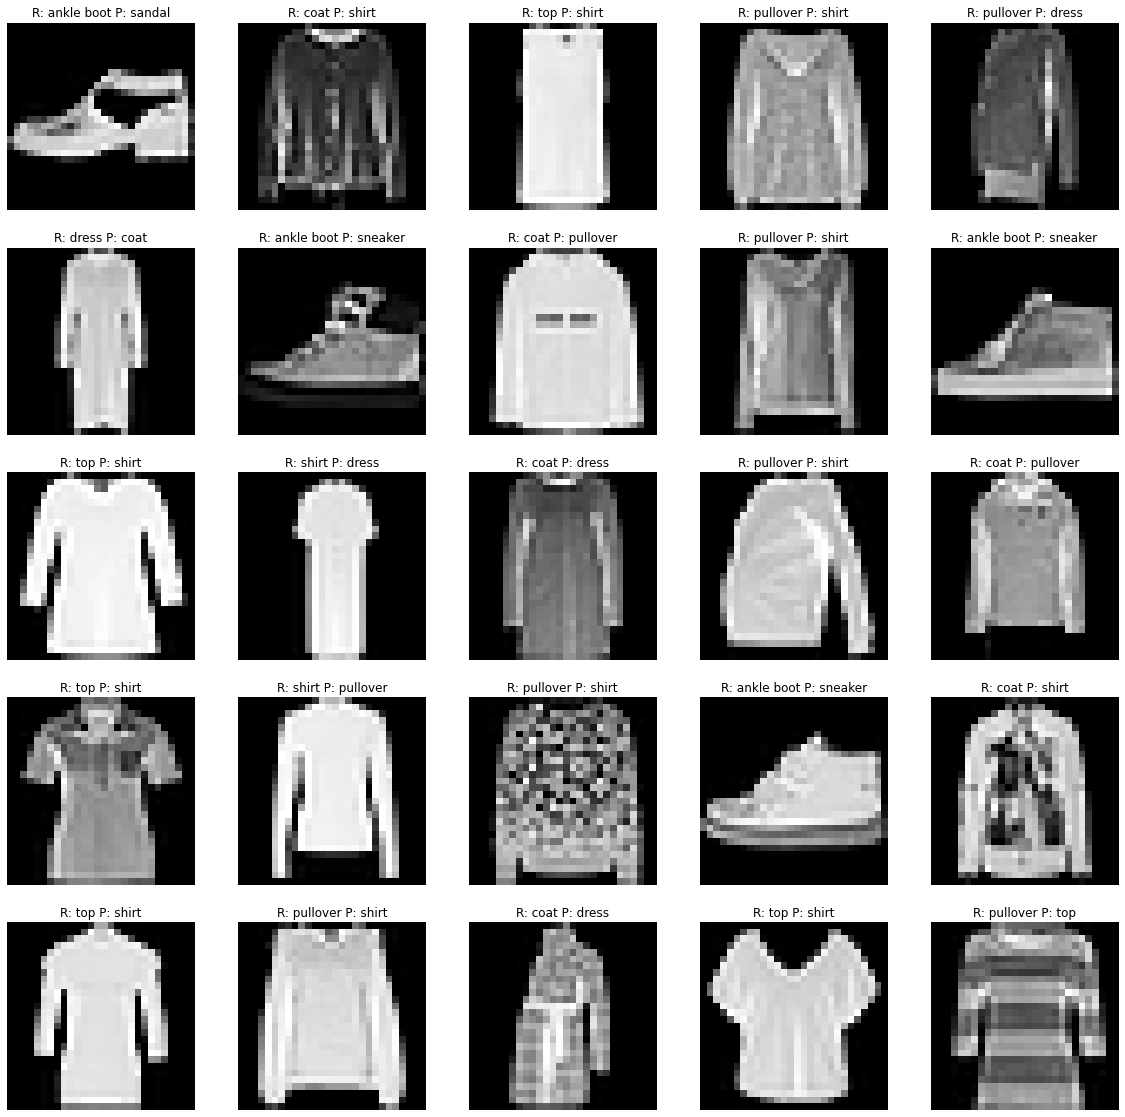

In [125]:
# 7. 모델 사용하기
plt_row = 5
plt_col = 5

test_dataloader = DataLoader(test_data, batch_size=1)

failed_cases = []
failed_labels = []
real_labels = []
cnt = 0

while cnt < (plt_row*plt_col):
  with torch.no_grad():
      for X, y in test_dataloader:
          X, y = X.to(device), y.to(device)
          pred = model(X)
          X = X.cpu()
          y = y.cpu()
          pred = pred.cpu()
          if y != np.argmax(pred):
            failed_cases.append(X)
            failed_labels.append(np.argmax(pred))
            real_labels.append(y)
            cnt += 1        


plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

i = 0
while i < (plt_row*plt_col):
    
    sub_plt = axarr[(int)(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(failed_cases[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + labelNames[real_labels[i]] + ' P: ' + labelNames[failed_labels[i]]
    sub_plt.set_title(sub_plt_title)

    i += 1    

plt.show()